# Example fitting AWG to plunger factor

Many systems have a bias T with attenuation on the fast lines. We need to have the correct factor for the AWG to the gate voltage, to make sure we are able to apply the same voltage to the gates with both the fast and the slow lines.

The data for this test can be acquired by making a scan2Dfast measurement, with the same gate on both axis, where the one axis is sweeped with the awg and one axis is stepped with the DAC's. Measurement should roughly be centred around an addition line. The measurement can be performed with the function `measure_awg_to_plunger`, which can be found in qtt.algorithms.awg_to_plunger.

From the slope of the addition line the awg to plunger conversion factor can be checked with the function `analyse_awg_to_plunger`. If the awg_to_plunger factor is correct, the addition line in a scan2dfast measurement should have a slope of -1. The code will fit the addition line, calculate the slope and from there the correction to the awg to plunger factor. 

Importing packages:

In [1]:
%matplotlib inline
import os
import qtt
import pickle
exampledatadir=os.path.join(qtt.__path__[0], 'exampledata')

from qtt.algorithms.awg_to_plunger import get_dataset, analyse_awg_to_plunger

Import the data and give it the shape it would have as a result of running the 'measure_awg_to_plunger' function.

In [2]:
dfile=os.path.join(exampledatadir, 'charge_stability_diagram_dac_vs_awg', 'charge_stability_diagram_dac_vs_awg.dat')
ds = get_dataset(dfile)
result = {'type': 'awg_to_plunger', 'awg_to_plunger': None, 'dataset': ds.location}

Running the function 'analyse_awg_to_plunger'. This function has two options for method: 'hough' (demonstrated in this example)
and 'click'. The 'hough' method finds the addition line automatically using the function cv2.HoughLines. This method is prefered, since it is most acurate. If it does not work for some reason, the method 'click' offers the posibility to indicate where the addition line is by clicking on it twice.

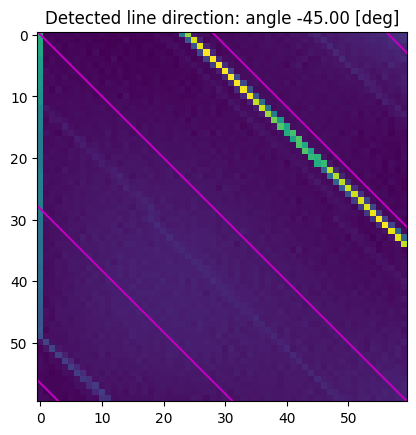

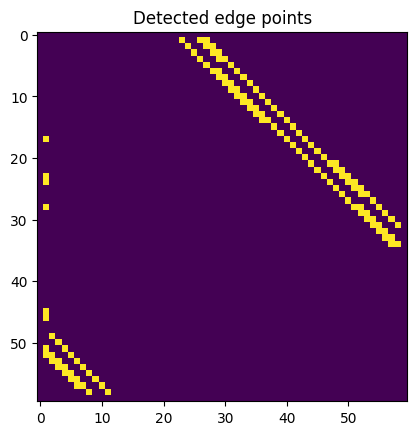

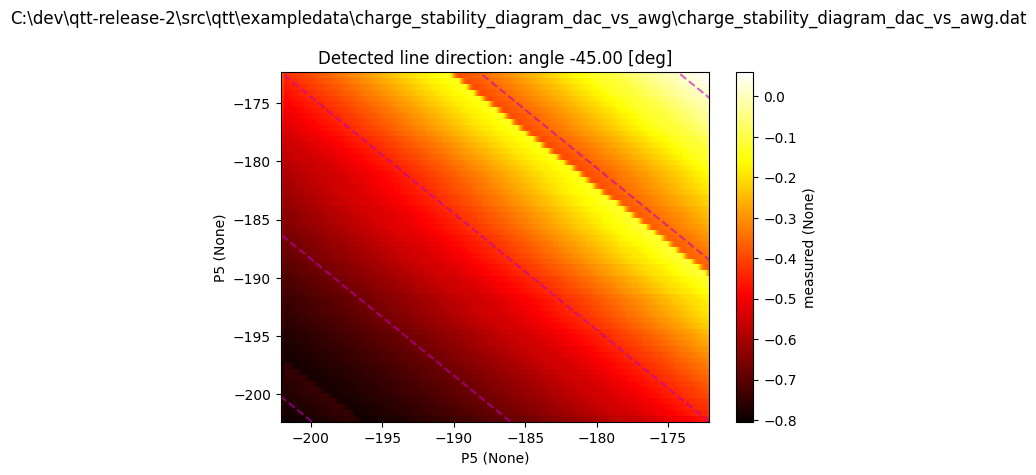

In [3]:
aresult = analyse_awg_to_plunger(result, method='hough', fig=100)

In [4]:
print('detected angle:  %.2f degrees' % aresult['angle_degrees'] + '\n' + 'correction of awg to plunger factor: %.5f'% aresult['correction of awg_to_plunger'])

detected angle:  -45.00 degrees
correction of awg to plunger factor: 1.00000
